<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Семинар 4: Основы статистики 

На этом семинаре мы поговорим про основы статистики. Мы уже вручную научились считать различные статистические характиристики. Пришло время посмотреть как это делается на компьютере. В качестве датасета мы будем использовать датасет по .... вашим страницам вконтакте. Ох! Сколько же всего интересного можно найти в этом датасете...

## 1. Подгружаем данные 

__Pandas__ — это библиотека для удобной работы с таблицами. Давайте подгрузим её из небытия в нашу тетрадку. 

In [1]:
import pandas as pd

Ещё добавим чисто техническую команду, которая нужна, чтобы рисовались картинки. Например, гистограмы. 

In [2]:
%matplotlib inline 

Вслед за тетрадкой подгружаем в переменную `df` датасет. Делается это с помощью команды `read_csv`, которая лежит внутри пакета `pandas`. Выше, при подгрузке пакета, мы задали ему краткое имя, `pd`. Теперь мы всегда будем обращаться к пакету по краткому имени. так, написав `pd.read_csv` мы вызовем из пакета команду для подгрузки данных. В аргументе команды нужно указать путь к тому месту, где лежат данные у нас на компьютере. Второй аргумент `sep` отвечает за то, какой в табличке разделитель между столбцами. В нашем случае это табуляция. На деле это может быть и запятая и точка с запятой и ... что угодно.

In [3]:
df = pd.read_csv('../data/vk_main.csv', sep='\t')

Начиная с этой секунды, данные по контакту всегда лежит внутри переменной `df`. Давайте попробуем что-нибудь сделать с этими данными. Например, посмотрим на несколько первых строчек. Это можно сделать с помощью метода `.head()`. В скобках можно указать какое-нибудь число. Тогда на экран выдастя такое количество строчек. 

In [4]:
df.head(7)

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Артём,MOSCOW,Еркин,0,181029517,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,16.0,0.375000
1,NaN,Россия,Армен,NaN,Хачатрян,15,73703994,1,0,1,...,1.750000,4.0,1.0,0.571429,1.0,0.0,0.0,0.0,47.0,0.531915
2,Москва,Россия,Abbos,Бекабад,Akhmedov,11,467673028,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,26.0,0.500000
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,83.0,0.518072
4,Алматы,Казахстан,Айжан,NaN,Саят,9,166045266,0,0,0,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,29.0,0.344828
5,Ташкент,Узбекистан,Alina,NaN,Kobets,0,494821147,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Москва,Россия,Алена,Москва,Иванова,12,153048650,0,0,1,...,10.750000,1.0,1.0,0.007752,0.0,0.0,0.0,0.0,37.0,0.297297


Команда `.tail()` по аналогии позволяет взглянуть на хвост таблицы.

In [5]:
df.tail()

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
330,Москва,Россия,Саша,NaN,Фогель,3,287966621,1,0,0,...,3.200,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.476190
331,Ростов-на-Дону,Россия,Ярослав,NaN,Паунов,0,194847541,1,0,0,...,2.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,24.0,0.541667
332,Москва,Россия,Кирилл,NaN,Горбунов,57,162727194,1,0,0,...,1.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,57.0,0.614035
333,Владимир,Россия,Алина,NaN,Захарова,3,222858681,0,0,0,...,1.875,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,34.0,0.588235
334,NaN,Россия,Глеб,NaN,Игнатьев,38,115455288,1,0,0,...,2.750,2.0,1.0,0.090909,0.0,0.0,0.0,0.0,16.0,0.687500


В табличке есть огромное количество самых разных переменных. Их названия довольно интуитивны. Будем разбираться с тем за что отвечает какая колонка по мере необходимости. Отметим только то, что все переменные разных типов. На основную информацию по ним можно посмотреть с помощью метода `.info()`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 96 columns):
city                               265 non-null object
country                            293 non-null object
first_name                         335 non-null object
home_town                          92 non-null object
last_name                          335 non-null object
likes_memes                        335 non-null int64
uid                                335 non-null int64
male_dummy                         335 non-null int64
facebook_dummy                     335 non-null int64
instagram_dummy                    335 non-null int64
skype_dummy                        335 non-null int64
twitter_dummy                      335 non-null int64
home_phone_dummy                   335 non-null int64
mobile_phone_dummy                 335 non-null int64
site_dummy                         335 non-null int64
can_post_dummy                     335 non-null int64
can_see_all_posts_dummy    

Метод `.shape` позволяет посмотреть на размер таблички (число строк и число столбиков).

In [7]:
df.shape

(335, 96)

## 2. Немного базовых навыков по работе с таблицами

Давайте освоим или вспомним (для кого как) базовые навыки по работе с таблицами в питоне. Чтобы вытащить столбец, у нему нужно через квадратные скобки обратиться по имени.

In [8]:
df['first_name'][:10]

0         Артём
1         Армен
2         Abbos
3          Адам
4         Айжан
5         Alina
6         Алена
7         Алена
8          Саша
9    Александра
Name: first_name, dtype: object

Узнать имена всех столбцов можно вот так:

In [9]:
df.columns

Index(['city', 'country', 'first_name', 'home_town', 'last_name',
       'likes_memes', 'uid', 'male_dummy', 'facebook_dummy', 'instagram_dummy',
       'skype_dummy', 'twitter_dummy', 'home_phone_dummy',
       'mobile_phone_dummy', 'site_dummy', 'can_post_dummy',
       'can_see_all_posts_dummy', 'can_see_audio_dummy',
       'can_write_private_message_dummy', 'has_mobile_dummy', 'has_ava_dummy',
       'wall_comments_dummy', 'english_dummy', 'folowers_cnt', 'albums_cnt',
       'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt', 'groups_cnt',
       'notes_cnt', 'photos_cnt', 'subscriptions_cnt', 'user_photos_cnt',
       'videos_cnt', 'pages_cnt', 'lang_cnt', 'change_city_school_cnt',
       'schools_cnt', 'relation_cat', 'alco_love_cat', 'smoke_love_cat',
       'life_main_cat', 'people_main_cat', 'political_cat',
       'private_prof_dummy', 'wall_can_comment_dummy', 'wall_comment_cnt',
       'wall_comment_max', 'wall_comment_mean', 'wall_comment_median',
       'wall_emoj

У строк по умолчанию нет имён, и им присваивются номера (левая полужирная колонка). С помощью метода `.iloc` можно вытащить из таблички интересующие нас строки. 

In [10]:
df.iloc[[1,42,304]]

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
1,NaN,Россия,Армен,NaN,Хачатрян,15,73703994,1,0,1,...,1.750000,4.0,1.0,0.571429,1.0,0.0,0.0,0.0,47.0,0.531915
42,NaN,Россия,Виктор,NaN,Архипов,5,154593851,1,0,0,...,2.636364,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,34.0,0.264706
304,Москва,Россия,Глеб,Москва,Семашко,0,78777081,1,0,0,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.0,0.727273


Можно сделать срез из нескольких подряд идущих строк. Например, вот так можно получить вторую и третью строчки таблицы:

In [11]:
df[2:4]

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
2,Москва,Россия,Abbos,Бекабад,Akhmedov,11,467673028,1,0,0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.500000
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.518072


Давайте предположим, что нам нужно получить всех студентов, у которых больше 700 друзей. Это можно сделать следущим срезом:

In [12]:
df[df['friends_cnt'] > 700]

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,83.0,0.518072
65,Москва,Россия,Виктор,Спарта,Львов,0,75808698,1,0,1,...,4.750000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,61.0,0.655738
114,Москва,Россия,Dasya,NaN,Stoletova,11,188271592,0,0,0,...,27.250000,2.0,1.0,0.006116,0.0,0.0,0.0,0.0,70.0,0.428571
234,Abuja,Нигерия,Владимир,NaN,Матыцин,0,215653325,1,0,0,...,3.750000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.0,0.636364
261,Москва,Россия,Павел,NaN,Блохин,1,145259791,1,0,0,...,3.545455,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,116.0,0.491379
298,NaN,NaN,Настя,NaN,Серова,57,74338788,0,0,0,...,2.857143,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,71.0,0.478873


Посмотрим детальнее. Результатом сравнения `df['friends_cnt']` с числом $700$ будет массив из `True` и `False`:

In [13]:
df['friends_cnt'] > 700

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
Name: friends_cnt, Length: 335, dtype: bool

Если в клетке `True`, у человека из строчки больше $700$ друзей. Если `False`, меньше. Если передать такой объект квадратным скобкам, то они выберут те элементы, напротив которых стоит `True`. В таблице останутся только самые дружелюбные люди.

In [14]:
df[df['friends_cnt'] > 700]

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,83.0,0.518072
65,Москва,Россия,Виктор,Спарта,Львов,0,75808698,1,0,1,...,4.750000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,61.0,0.655738
114,Москва,Россия,Dasya,NaN,Stoletova,11,188271592,0,0,0,...,27.250000,2.0,1.0,0.006116,0.0,0.0,0.0,0.0,70.0,0.428571
234,Abuja,Нигерия,Владимир,NaN,Матыцин,0,215653325,1,0,0,...,3.750000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.0,0.636364
261,Москва,Россия,Павел,NaN,Блохин,1,145259791,1,0,0,...,3.545455,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,116.0,0.491379
298,NaN,NaN,Настя,NaN,Серова,57,74338788,0,0,0,...,2.857143,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,71.0,0.478873


Такие срезы можно делать по любым условиям. Например, можно отобрать в табличку девушек не из Москвы, у которых в профиле есть ссылка на instagram:

In [15]:
df[(df['instagram_dummy'] == 1)&(df['male_dummy'] == 0)&
      ((df['city'] != 'Москва')|(df['home_town'] != 'Москва'))].head()

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
7,NaN,NaN,Алена,NaN,Бальзамова,0,152115241,0,0,1,...,23.250000,4.0,1.0,0.014337,0.0,0.0,0.0,0.0,35.0,0.371429
13,Москва,Россия,Алина,Сыктывкар,Губкина,3,134713433,0,0,1,...,7.416667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,27.0,0.444444
15,Москва,Россия,Алина,NaN,Плетминцева,6,77312439,0,0,1,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,36.0,0.305556
18,Москва,Россия,Алёна,NaN,Богданова,0,290180869,0,0,1,...,3.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,87.0,0.540230
21,Москва,Россия,Анастасия,Курск,Лукьянченко,4,123084933,0,0,1,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,23.0,0.304348


Знак `&` говорит, что должны выполнится оба условия. Он читается как союз `и`. Если мы хотим, чтобы выполнялось хотябы одно из условий, можно использовать союз `или`, который обозначается значком `|`. Значок `!` отвечает за отрицание. То есть мы командой 

`(df['instagram_dummy'] == 1)&(df['male_dummy'] == 0)&((df['city'] != 'Москва')|(df['home_town'] != 'Москва'))` 

говорим табличке: 

`(у них есть инстаграм) и (они девушки) и ((их город проживания НЕ москва) или (их родной город не Москва))` 

И на выход получаем маленькую подтаблицу, где все эти условия выполнены.

## 3. Описательная статистика в pandas

Мы с вами обсудили до этого довольно большое число разных статистических показателей. Давайте посмотрим как искать их в `pandas`.

> В статистике, строчка датафрейма называется «наблюдением» (*observation*), а столбец — «переменной» (*variable*). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк, но не может быть столбца, в котором перемешаны строки и числа).

### 3.1 Максимальное и минимальное значения

Посмотрим какое в таблице есть максимальное и минимальное количество фоток в профиле.

In [16]:
df.photos_cnt.max()

930.0

In [17]:
df['photos_cnt'].min()

0.0

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку. Давайте посмотрим кто накопил такое большое число фоток в своём профиле. 

In [18]:
df[df.photos_cnt == df.photos_cnt.max()][['first_name','last_name']]

,first_name,last_name
172,Семён,Крапивин


### 3.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них. 

**Среднее значение**

Среднее не нуждается в представлении. Вычислить его довольно просто: сложите все значения и разделите полученную сумму на их количество.

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

В случае со средним значением «серединой» датасета будет среднее арифметическое его значений. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

Найдём среднее количество друзей, которое есть у первака.

In [19]:
df.friends_cnt.mean()

236.28802588996763

Это среднее значение говорит нам, что «типичный» первокурсник добавил к себе в друзяшки вконтакте 236 человек.

**Медиана**

Медиана, как и среднее значение, нужна для определения типичного значения.

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [20]:
df.friends_cnt.median()

189.0

Медианное число друзей составляет $189$ человек. Грубо говоря, получается, что у половины перваков меньше $189$ друзей, а у второй половины больше $189$ друзей. 

И медиана, и среднее значение отражают типичное значение. Когда в выборке нет выбросов, они примерно одинаковы. Если в выборке есть выбросы, то их довольно сильно разносит друг от друга, Например, если посмотреть на количество лайков, которое первак оставляет в паблике "ХАЕР СКУЛ ОФ МЕМЕС", можно увидеть, что среднее значение довольно сильно отличается от медианы.

In [21]:
df.likes_memes.mean()

16.13731343283582

In [22]:
df.likes_memes.median()

2.0

Какие-то деятели лайкают слишком много мемесов и смещают среднее вверх. Давайте посмотрим на гистограмму лайков и друзей.

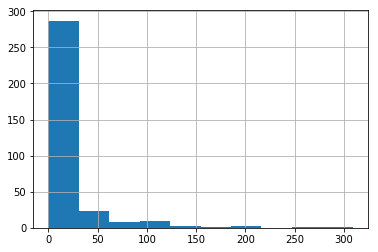

In [23]:
df.likes_memes.hist()

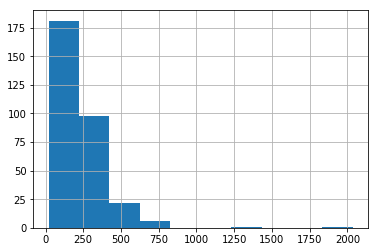

In [24]:
df.friends_cnt.hist()

Видели? У лайков очень длинный хвост. Какой-то деятель оставил в паблосе аж $300$ лайков. Чем длиннее хвост, тем страшнее выбросы. У числа друзей хвост короче. Из-за этого среднее и медианное число друзей ближе друг к другу. __Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет. 

**Мода**

Это последняя мера центральной тенденции, о которой пойдёт речь. Мода определяется как значение, которое наиболее часто встречается в наборе данных. Давайте посмотрим на самое модное число лайков.

In [25]:
df.likes_memes.mode()

0    0
dtype: int64

Обратите внимание, что если значение появляется в данных неоднократно, оно приблизит среднее значение к моде. Чем чаще появляется значение, тем сильнее оно влияет на среднее. Таким образом, мода показывает наиболее значимый фактор, формирующий среднее значение.

Приятная особенность моды состоит в том, что её мы можем посмотреть не только для численных данных, но и для категориальных. Например, мы можем узнать какое имя на потоке самое частое. 

In [26]:
df.first_name.mode()

0    Анастасия
dtype: object

С помощью ещё одного няшного метода `value_counts()` мы можем посмотреть на то, как часто оно встречалось. 

In [27]:
df.first_name.value_counts()[:10]

Анастасия    12
Артём         8
Мария         7
Настя         7
Полина        7
Аня           7
Александр     6
Елизавета     5
Екатерина     5
Дарья         5
Name: first_name, dtype: int64

### 3.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько жесткий в данных разброс. Наример, в случае лайков, хвост длиннее, чем в случае друзей. Разные меры разброса помогают понять это. Они отвечают на вопрос: «Как сильно варьируются мои данные?». Например, мы поняли, что типичный число друзей находится в районе $200$. Возникает вопрос, а на сколько больше или меньше может быть число друзей.

**Дисперсия и стандартное отклонение**

Давайте посмотрим на то, насколько число друзей отличается от среднего значения. Для этого будем брать число друзей $x_i$ и вычитать из него среднее, $\bar x$:

$$
(x_i - \bar x)
$$

Предположим, что среднее значение $30$. У парня по имени Ярополк $25$. У девушки по имени Рагнеда $35$. Получается, что Ярополк отличается от типичного первокурсника на $25 - 30 = -5$ друзей. А Рагнеда на $35 - 30 = 5$ друзей. Когда мы сложим эти различия, получится $0$. Разброса нет. А это неправда. Из-за этого обычно разность возводят в квадрат. Тогда поулчается, что разброс в выборке составляет $\frac{1}{2} \cdot((25-30)^2 + (35-30)^2) = 25$ квадратных друзей. 

Ещё квадрат нужен для того, чтобы подчеркнуть, что чем сильнее число друзей отличается от среднего, тем выше разброс. Посчитанная нами выше величина называется *дисперсией*

$$
\sigma^2= \frac{1}{n} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Проблема дисперсии в том, что она измеряется в квадратных друзьях. Чтобы вернуться назад, к обычным друзьям, нужно извлеч из неё корень. Тогда получится величина, которая называется *среднеквадратическим отклонением* или *стандартным отклонением*. 

In [28]:
df.friends_cnt.var() # дисперсия, variance

34789.718719791534

In [29]:
df.friends_cnt.std() # стандартное отклонение, standard deviation

186.5200223026781

Часто дисперсию считают по формуле 

$$
\sigma^2= \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Это правильнее. Почему вы узнаете на математической статистике. Пока что это за гранью нашего понимания. Просто свыкнитесь с этой мыслью до тех пор, пока не изучите теорию вероятностей. Когда изучите, можно начинать рефлексировать. 

Давайте вручную убедимся, что питон считает именно по такой формуле. Для этого вытащим в переменную `friends` число друзей. Иногда в табличке встречаются пропуски, которые обозначаются символом `NA` (not availible). Нужно избавиться от пропусков. Это помогает сделать метод `.dropna()`. Он выбросит все пропуски.

In [30]:
friends = df.friends_cnt.dropna() # выбросили все пропуски
n = friends.shape[0]      # узнали сколько всего осталось строк

# посчитали дисперсию по классной формуле
sum((friends - friends.mean())**2)/(n - 1)

34789.71871979152

In [31]:
# посчитали дисперсию по недостаточно классной формуле
sum((friends - friends.mean())**2)/n

34677.1306333197

### 3.4 Метод describe

**Метод describe** считает всё и сразу! 

In [32]:
df.describe()

,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,skype_dummy,twitter_dummy,home_phone_dummy,mobile_phone_dummy,site_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
count,335.000000,3.350000e+02,335.000000,335.00000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000,309.000000,309.000000
mean,16.137313,1.858027e+08,0.447761,0.01194,0.179104,0.065672,0.020896,0.029851,0.110448,0.098507,...,4.831083,0.405316,0.199336,0.013187,0.004983,0.769103,0.0,1.063123,37.478964,0.436369
std,37.147130,1.152061e+08,0.498007,0.10878,0.384013,0.248078,0.143249,0.170430,0.313916,0.298445,...,8.775024,1.468050,0.795906,0.074001,0.064356,7.325800,0.0,12.328531,18.911715,0.148713
min,0.000000,7.976893e+06,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,0.000000,1.007564e+08,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,24.000000,0.318182
50%,2.000000,1.575757e+08,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.000000,0.450450
75%,14.000000,2.402318e+08,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,48.000000,0.543478
max,309.000000,5.338451e+08,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,77.500000,13.000000,12.000000,0.928571,1.000000,84.000000,0.0,205.000000,116.000000,0.789474


Для каждой переменной мы видим: 

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Кстати говоря, любой квантиль можно посчитать следующей функцией. 

In [33]:
df.friends_cnt.quantile(0.55)

204.8

Выходит, что у $55\%$ людей из выборки меньше $204$ друзей, и у $45\%$ больше. 

Можно построить такую же табличку только для категориальных переменных. 

In [34]:
df.describe(include='object')

,city,country,first_name,home_town,last_name,schools_cnt,relation_cat,life_main_cat,people_main_cat,political_cat,wall_emoji_trace,wall_text
count,265,293,335,92,335,38,155,102,103,20,187,262
unique,42,14,183,43,327,12,7,8,6,5,184,242
top,Москва,Россия,Анастасия,Москва,Phil,а,не указано,0.0,0.0,умеренные,✨⭐⭐►►◄◄⭐⭐✨👉🎊🎉🎁🐣😋😉👉👉👉,
freq,219,270,12,45,2,10,121,68,69,9,2,11


* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

## 4. Поиск ответов на глупые вопросы 

Комбинируя все те знания, которые мы с вами добыли выше, можно искать ответы на разные вопросы. Например, давайте попробуем понять, какое среднее число лайков ставят под мемасы девушки. Для этого придётся сделать срез. 

In [35]:
df[df.male_dummy == 0].likes_memes.mean()

20.681081081081082

Таким же срезом можно понять какое среднее число лайков ставят парни.

In [36]:
df[df.male_dummy == 1].likes_memes.mean()

10.533333333333333

**ШОК КОНТЕНТ!**  А можно сразу узнать для обеих категорий! В этом помогает метод `groupby`.

In [37]:
df.groupby('male_dummy').likes_memes.mean()

male_dummy
0    20.681081
1    10.533333
Name: likes_memes, dtype: float64

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это пол. 

![](https://www.maddog357.com/wp-content/uploads/2017/04/iStock-156380717.jpg)